In [ ]:
!pip install scanpy==1.9.1
!pip install matplotlib==3.6

In [ ]:
def plot_umap_with_label(adata, ax, label_key,
                                 use_embedding=False, is_original_data=True):

    # Determine the repository for UMAP computation
    umap_key = 'X_emb' if use_embedding else None

    if use_embedding and 'X_emb' not in adata.obsm.keys():
        raise ValueError("Embedding 'X_emb' not found in adata.obsm")

    # Compute UMAP
    if 'X_umap' not in adata.obsm.keys() or use_embedding:
        sc.pp.neighbors(adata, use_rep=umap_key)
        sc.tl.umap(adata)

    # Extract UMAP data and labels
    x, y = adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1]
    unique_labels = sorted(adata.obs[label_key].unique())

    # Extract colors from tab10 and pastel1 color maps
    colors_tab10 = plt.cm.tab10.colors
    colors_pastel1 = plt.cm.Pastel1.colors

    # Combine colors from both color maps
    combined_colors = list(colors_tab10) + list(colors_pastel1)

    # Map labels to the combined colors
    color_map = {label: color for label, color in zip(unique_labels, combined_colors)}

    # Plot each label with its assigned color
    for label in unique_labels:
        label_mask = adata.obs[label_key] == label
        ax.scatter(x[label_mask], y[label_mask], label=label, color=color_map[label], s=1)

    if is_original_data:
        # Create a legend with large dots
        legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), scatterpoints=1, ncol=3, markerscale=3)


/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


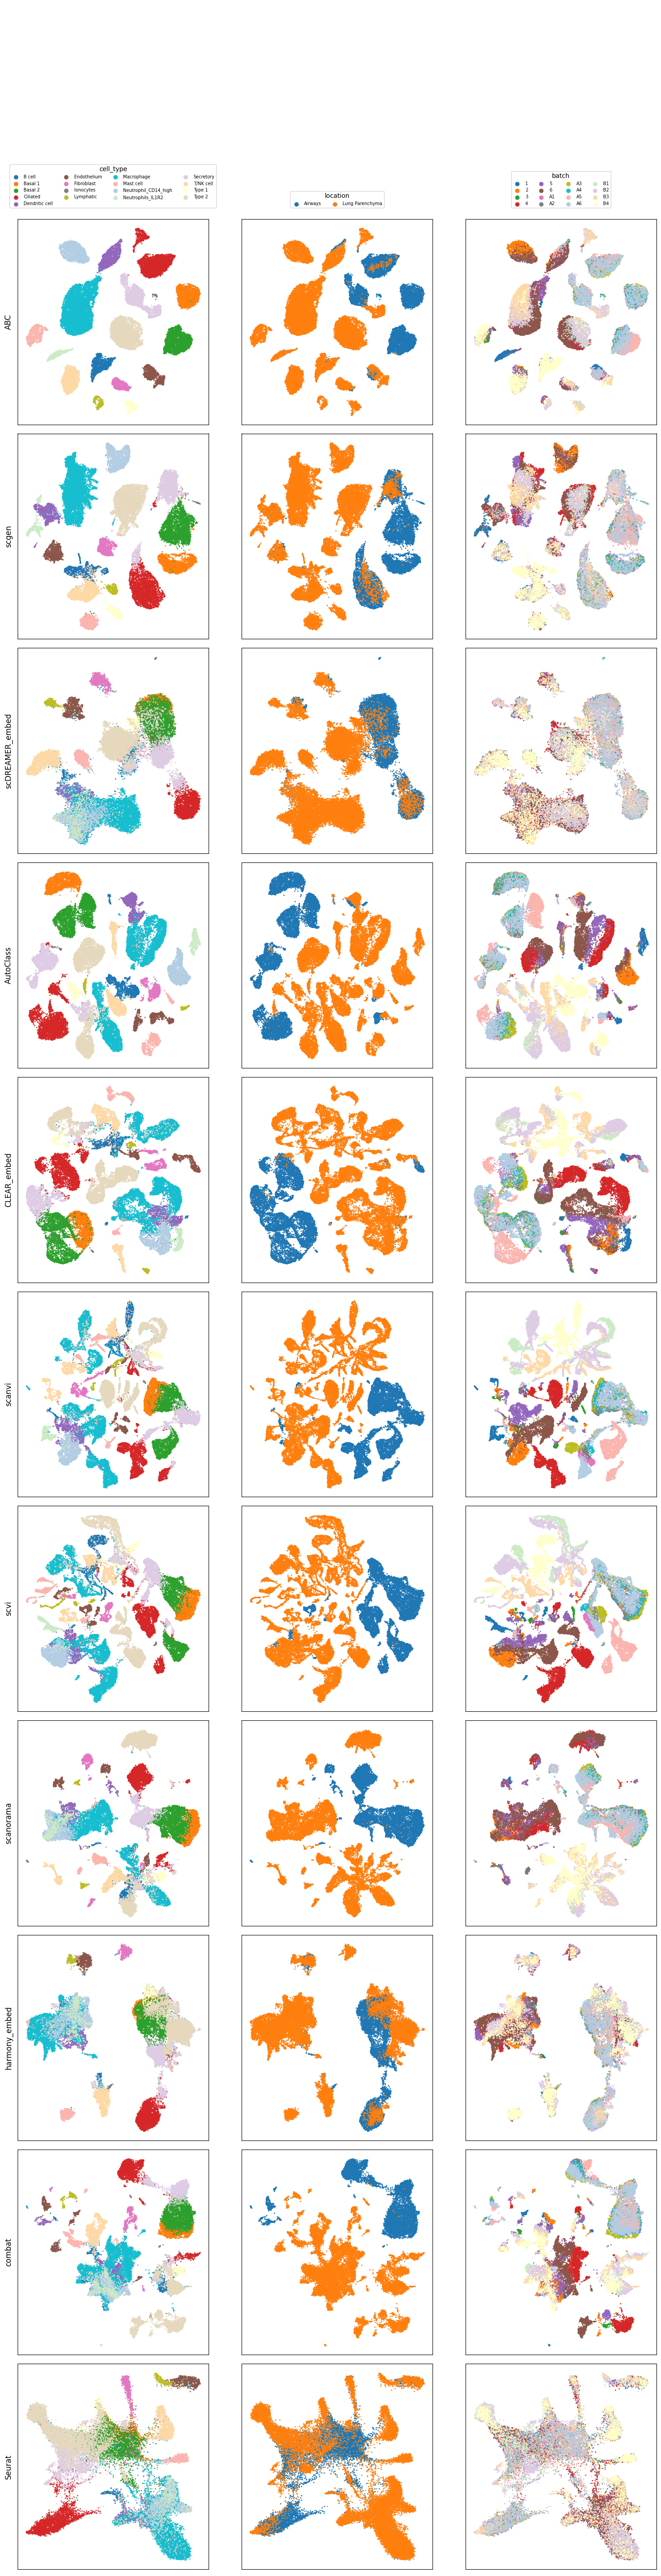

In [ ]:
import os
from pathlib import Path
import sys
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec


# When using colab, set the path to the modules directory to use saved modules
sys.path.insert(0,'/content/drive/MyDrive/modules/')
import plottingData
from datasets_dict import datasets

methods = [
            'ABC',
            'scgen',
            'scDREAMER_embed',
            'AutoClass',
            'CLEAR_embed',
            'scanvi',
            'scvi',
            'scanorama',
            'harmony_embed',
            'combat',
            'Seurat',
            ]

embedding_methods = ['ABC', 'harmony_embed', 'scDREAMER_embed', 'CLEAR_embed']
lung_biopsies_batchs = ['A1', 'A2','A3', 'A4', 'A5', 'A6']


path = '/content/drive/MyDrive/Colab Notebooks/integrationDatasets/integratedDatasets/'
save_path = '/content/drive/MyDrive/Colab Notebooks/integrationDatasets/final_plots/'
dpi = 300


# Define the number of rows and columns for the subplot grid
num_methods = len(methods)
num_cols = 3
dataset_name = 'Lung_atlas_public'

# Create a GridSpec layout
fig = plt.figure(figsize=(15, num_methods * 5 + 2))  # Adjust the figure size as needed
gs = gridspec.GridSpec(num_methods + 1, num_cols, figure=fig)


# Iterate over each integration method and label key to create UMAP plots
for i, method in enumerate(methods):

    # get dataset parameters from the dictionary
    label_key = datasets[dataset_name]['label_key']
    batch_key = datasets[dataset_name]['batch_key']

    # define paths
    inPath = os.path.join(path, method)

    # read integrated dataset
    integrated_data = sc.read(os.path.join(inPath, f"{dataset_name}_integrated.h5ad"))

    integrated_data.obs['location'] = integrated_data.obs[batch_key].map(
        lambda x: 'Airways' if x in lung_biopsies_batchs else 'Lung Parenchyma'
    )

    # define keys for plotting
    label_keys = [label_key, 'location', batch_key]

    # Add legends in the first row
    if i == 0:
        for j, label_key in enumerate(label_keys):
            # Get unique labels for current label_key
            unique_labels = sorted(integrated_data.obs[label_key].unique())

            # Extract colors from tab10 and pastel1 color maps
            colors_tab10 = plt.cm.tab10.colors
            colors_pastel1 = plt.cm.Pastel1.colors

            # Combine colors from both color maps
            combined_colors = list(colors_tab10) + list(colors_pastel1)

            # Map labels to the combined colors
            color_map = {label: color for label, color in zip(unique_labels, combined_colors)}

            ax = fig.add_subplot(gs[0, j])
            ax.axis('off')  # Turn off axis

            # Create legend with default colors
            for label, color in color_map.items():
                ax.scatter([], [], label=label, color=color)
            ax.legend(title=label_key, loc='lower center', ncol=4, fontsize=7, bbox_to_anchor=(0.5, 0))


    # method specific data preparations
    if method == 'ABC':
      integrated_data.obsm['X_emb'] = integrated_data.X.copy()


    # Plot integrated dataset
    for j, label_key in enumerate(label_keys):
        ax = fig.add_subplot(gs[i + 1, j])  # Start from the second row in GridSpec
        plot_umap_with_label(integrated_data, ax, label_key,
                             use_embedding=method in embedding_methods,
                             is_original_data=False)
        if j == 0:
            ax.set_ylabel(method, fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()